# Harnessing Machine Learning for interpersonal physical alignment

### organize the data

In [29]:
import pandas as ps
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

def dfbuilder(files):
    final=ps.DataFrame(columns=['Time_x', 'Experiment_x', ' Hand Type_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',' Pinch Strength_x', 
       'Time_y', 'Experiment_y',
       ' Hand Type_y', ' # hands_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'])
    for file in files:
        temp=ps.read_csv(file)
        temp=temp.ix[700:]
        temp[" Hand Type"]=Series([1 if i=="right" else 2 for i in temp[" Hand Type"]])
        if str.__contains__(file,"Alone"):  
            temp.insert(loc=1, column='Experiment', value="1")
            temp=temp.drop(' Frame ID',axis=1)
            Handright=ps.read_csv('HandRight.csv')
            Handright[" Hand Type"]=Series([1 if i=="right" else 2 for i in Handright[" Hand Type"]])
            Handright.insert(loc=1, column='Experiment', value="1")
            Handright = Handright.iloc[:len(temp)-1]
            Handright = Handright.reset_index(drop=True)
            Handright=Handright.drop(' Frame ID',axis=1)
            temp = temp.reset_index(drop=True)
            temp = ps.merge(temp, Handright, left_index=True, right_index=True)
        else:
            if str.__contains__(file,"Sync"):
                temp.insert(loc=1, column='Experiment', value="2")
            if str.__contains__(file,"Spontan"):
                temp.insert(loc=1, column='Experiment', value="3") 
            dfright=temp[temp[" Hand Type"]==1]
            dfleft=temp[temp[" Hand Type"]==2]
            dfright.set_index(' Frame ID',inplace=True)
            dfleft.set_index(' Frame ID',inplace=True)
            temp=ps.merge(dfleft, dfright, how='left',on=' Frame ID') 
        final=ps.concat([final,temp])
        
    final=final.drop(["Experiment_y"],axis=1) 
    final=final.dropna()
    final[final.index%20==2]
    return final

In [30]:
import glob
test= dfbuilder(glob.glob('C:/Users/lilac/Downloads/last/Unity Data/Validation/**/*.csv', recursive=True))
train= dfbuilder(glob.glob('C:/Users/lilac/Downloads/last/Unity Data/Training/**/*.csv', recursive=True))
#train=train.sort_values(by=['Frame ID_x'])
train.head()


,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
129224,341.7967,3,2.0,2,-81.07576,188.0205,-6.599422,-3.531912,-34.794060,-51.33676,...,-0.454103,195.7942,174.3912,28.72469,277.2327,-25.76938,157.6368,0.0,0.106288,0.0
129226,341.8133,3,2.0,2,-81.06532,187.2831,-7.509534,-5.439296,-35.477880,-53.12909,...,-0.450451,196.1415,174.7783,28.34431,278.0301,-25.50721,156.7763,0.0,0.112178,0.0
129228,341.8307,3,2.0,2,-81.30278,186.7463,-8.332627,-14.389670,-31.827650,-44.94197,...,-0.447981,196.6401,175.1746,27.94244,279.6292,-23.55376,158.0756,0.0,0.136341,0.0
129230,341.8468,3,2.0,2,-81.70728,186.4145,-9.010276,-26.437670,-17.545160,-36.06673,...,-0.447134,197.2184,175.6191,27.47637,281.9268,-20.49721,160.4339,0.0,0.152158,0.0
129232,341.8634,3,2.0,2,-82.14220,186.4485,-9.670983,-20.348470,2.364992,-39.13349,...,-0.452682,197.8856,176.1802,27.03134,285.1833,-15.53749,164.6476,0.0,0.159900,0.0


## graph

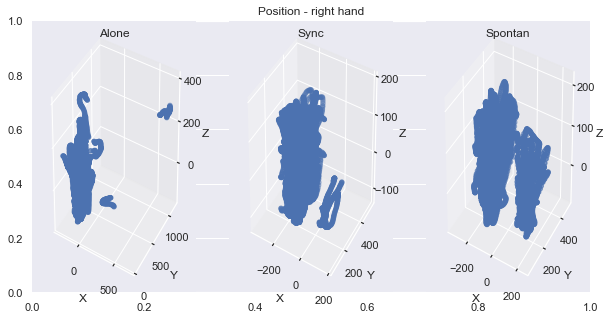

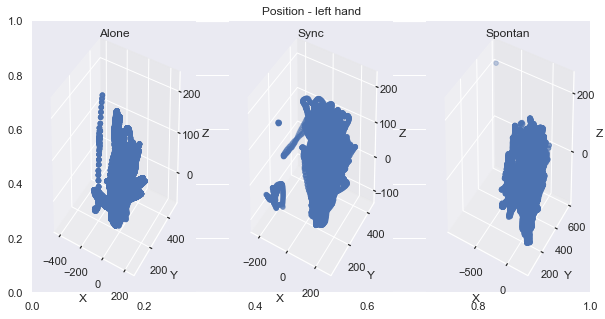

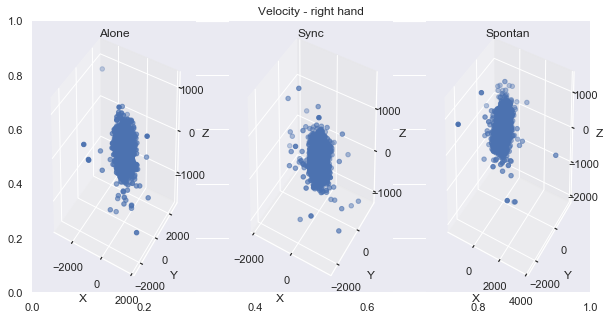

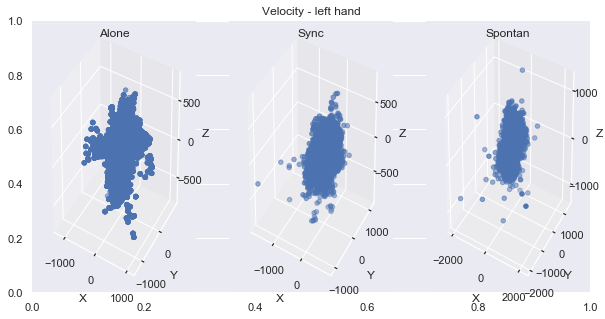

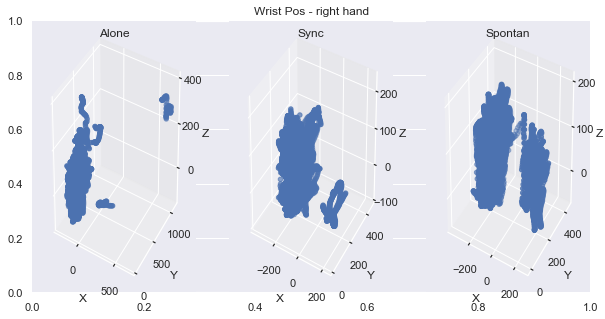

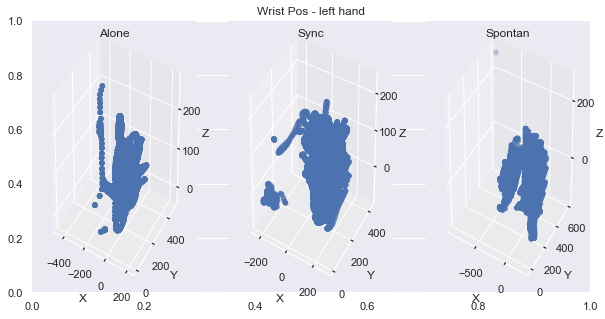

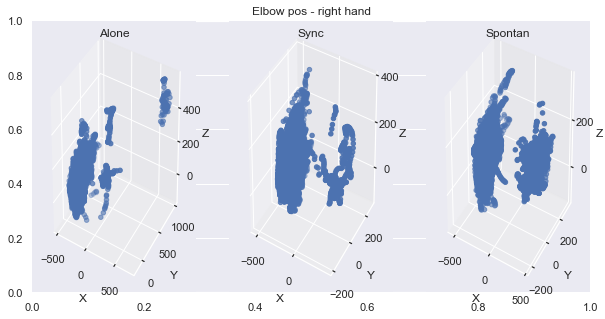

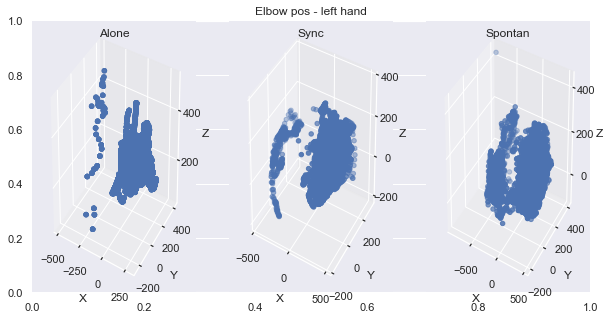

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for pose in ["Position", "Velocity", "Wrist Pos"]:
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - right hand")
    for i in range(1,4):
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_x"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_x"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_x"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
        
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - left hand")   
    for i in range(1,4):   
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_y"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_y"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_y"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - right hand")
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_x"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_x"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_x"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
        
fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - left hand")   
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_y"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_y"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_y"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
plt.show()

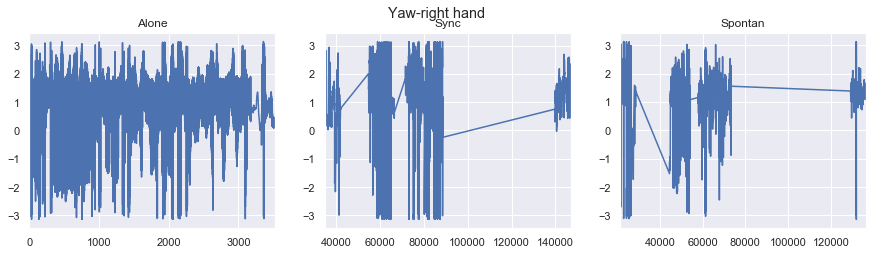

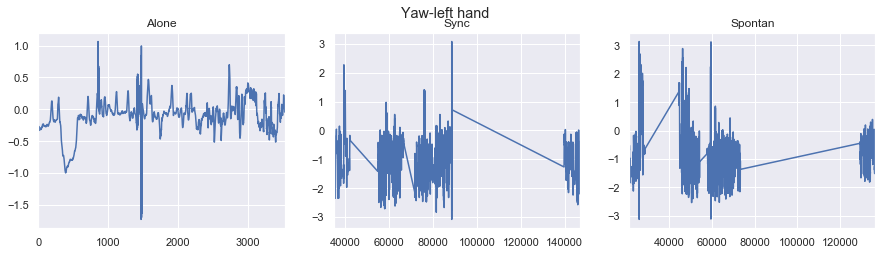

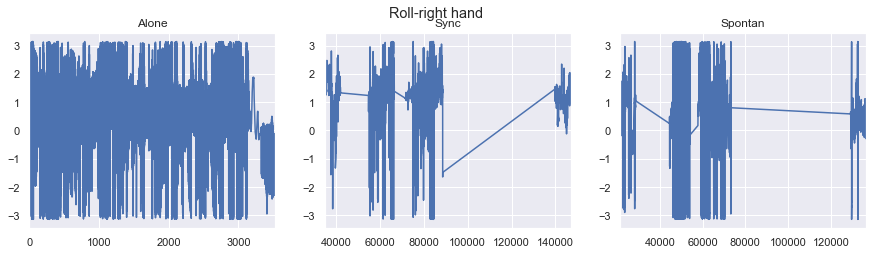

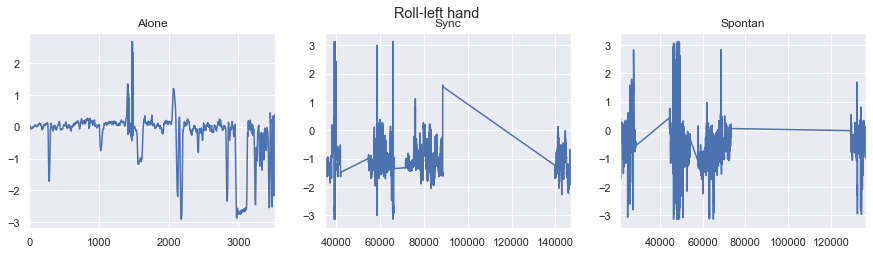

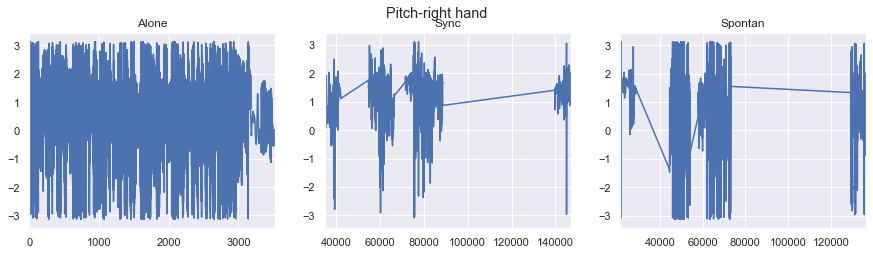

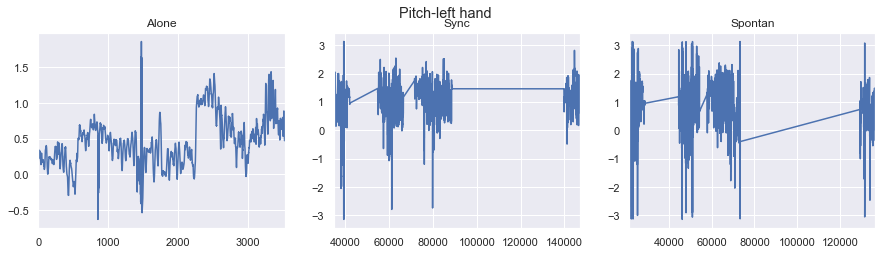

In [34]:
import seaborn as sns
sns.set()
train.sort_index(inplace=True)
for move in [" Yaw"," Roll"," Pitch"]:
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-right hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_x'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
       
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-left hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_y'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

1 = Alone
2 = Sync
3 = Spontan


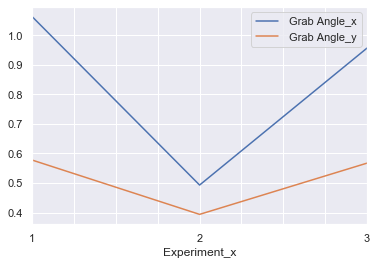

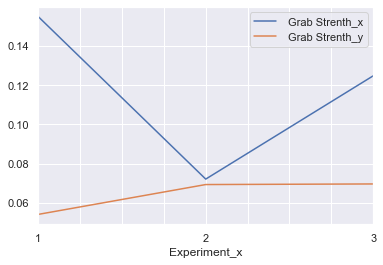

In [82]:
train.groupby(['Experiment_x'])[' Grab Angle_x',' Grab Angle_y'].mean().plot()
train.groupby(['Experiment_x'])[' Grab Strenth_x',' Grab Strenth_y'].mean().plot()
print("1 = Alone")
print("2 = Sync")
print("3 = Spontan")

# Models

In [105]:

X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (88369, 40)
Training Labels: (88369,)
Testing FeatureSet: (39800, 40)
Testing Labels: (39800,)


## null classifer

In [114]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
print("test score:",dummy.score(X_test,y_test))
print("train score:",dummy.score(X_train,y_train))

test score: 0.3356532663316583
train score: 0.33526462899885706


In [115]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",dummy.score(X_t_test,y_test))
print("train score:",dummy.score(X_t_train,y_train))

Score from the PCA
test score: 0.3335678391959799
train score: 0.3347893492061696


In [116]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",dummy.score(X_t_test,y_test))
print("train score:",dummy.score(X_t_train,y_train))

Score from the ICA
test score: 0.3341206030150754
train score: 0.33227715601625


In [117]:
from sklearn.metrics import f1_score
y_pred=dummy.predict(X_test)
print("F1 Score:",f1_score(y_test, y_pred,average='weighted'))

F1 Score: 0.3341148641107362


In [118]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,3767,3758,3842,11367
2,4722,4717,4744,14183
3,4728,4744,4778,14250
All,13217,13219,13364,39800


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.33      0.31     11367
           2       0.36      0.33      0.34     14183
           3       0.36      0.34      0.35     14250

    accuracy                           0.33     39800
   macro avg       0.33      0.33      0.33     39800
weighted avg       0.34      0.33      0.33     39800



## naive_bayes

In [20]:
X_train=train[[' Position Z_x',  ' Velocity Y_x',' Pitch_x', ' Roll_x',  
       ' Wrist Pos Y_x', ' Wrist Pos Z_x',  ' Elbow Pos Y_x',' Elbow Pos Z_x',  ' Grab Angle_x',  
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y',  ' Wrist Pos X_y', ' Wrist Pos Y_y',' Elbow Pos Z_y',' Grab Strenth_y']]
X_test=test[[' Position Z_x', ' Velocity Y_x',' Pitch_x', ' Roll_x',  
       ' Wrist Pos Y_x', ' Wrist Pos Z_x',  ' Elbow Pos Y_x',
       ' Elbow Pos Z_x',  ' Grab Angle_x',' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y',  ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Elbow Pos Z_y',' Grab Strenth_y']]

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.8353015075376884
train score: 0.7963878735755752


In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.2856030150753769
train score: 0.29669906867793006


In [24]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.2856030150753769
train score: 0.2967330172345506


In [25]:
from sklearn.metrics import f1_score
y_pred=clf.predict(X_test)
print("F1 Score:",f1_score(y_test, y_pred,average='weighted'))

F1 Score: 0.8347189307210515


In [26]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,10984,21,362,11367
2,279,10453,3451,14183
3,277,2165,11808,14250
All,11540,12639,15621,39800


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96     11367
           2       0.83      0.74      0.78     14183
           3       0.76      0.83      0.79     14250

    accuracy                           0.84     39800
   macro avg       0.84      0.84      0.84     39800
weighted avg       0.84      0.84      0.83     39800



## Logistic Regression

In [29]:
X_train=train[['Time_x',  ' Position X_x',' Velocity Y_x',
          ' Yaw_x', ' Wrist Pos X_x',' Elbow pos X_x', ' Elbow Pos Y_x',
          ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
          ' Pinch Strength_x', 'Time_y',
          ' Position X_y', ' Position Y_y', ' Position Z_y',
          ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
          ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
          ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
          ' Grab Strenth_y', ' Grab Angle_y']]
X_test=test[['Time_x',  ' Position X_x',' Velocity Y_x',
         ' Yaw_x', ' Wrist Pos X_x',' Elbow pos X_x', ' Elbow Pos Y_x',
         ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
         ' Pinch Strength_x', 'Time_y', 
         ' Position X_y', ' Position Y_y', ' Position Z_y',
         ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
         ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
         ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
         ' Grab Strenth_y', ' Grab Angle_y' ]]

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.7630402010050251
train score: 0.9031221355905351


In [31]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the PCA
test score: 0.364572864321608
train score: 0.41365184623567086


In [33]:
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the ICA
test score: 0.35804020100502515
train score: 0.3525670766897894


In [34]:
y_pred=logreg.predict(X_test)
f1_score(y_test, y_pred,average='weighted')

0.7627686586395407

In [35]:
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,11367,0,0,11367
2,0,9003,5180,14183
3,0,4251,9999,14250
All,11367,13254,15179,39800


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11367
           2       0.68      0.63      0.66     14183
           3       0.66      0.70      0.68     14250

    accuracy                           0.76     39800
   macro avg       0.78      0.78      0.78     39800
weighted avg       0.76      0.76      0.76     39800



## ADABOOST

In [38]:
X_train=train[[ ' Pitch_x', ' Wrist Pos X_x',' Wrist Pos Y_x',  ' Position X_y',  ' Position Z_y', ' Velocity X_y',  
                ' Pitch_y', ' Roll_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',' Wrist Pos Z_y',' Elbow Pos Y_y', 
                ' Grab Angle_y']]
X_test=test[[ ' Pitch_x', ' Wrist Pos X_x',' Wrist Pos Y_x', ' Position X_y', ' Position Z_y',
              ' Velocity X_y',  ' Pitch_y',' Roll_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
              ' Wrist Pos Z_y',  ' Elbow Pos Y_y', ' Grab Angle_y']]

In [39]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=59)
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.8121608040201005
train score: 0.8343197275062522


In [40]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [41]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.37821608040201005
train score: 0.37478074890515906


In [42]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.2856030150753769
train score: 0.2967330172345506


In [43]:
y_pred=clf.predict(X_test)
f1_score(y_test, y_pred ,average='weighted')

0.8104803915628414

In [44]:
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,11265,65,37,11367
2,125,9247,4811,14183
3,20,2418,11812,14250
All,11410,11730,16660,39800


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     11367
           2       0.79      0.65      0.71     14183
           3       0.71      0.83      0.76     14250

    accuracy                           0.81     39800
   macro avg       0.83      0.82      0.82     39800
weighted avg       0.82      0.81      0.81     39800

